# Ideas

Can we find evidence among all contexts of positive examples of a property by comparing them to the contexts of all negative examples?

Here, similar concepts should come in handy, as there should be a lot of overlap in their contexts. Distinctive aspects should be all the more salient. 



In [7]:
import json
import pandas as pd

from tqdm import tqdm
import os

from sklearn.feature_extraction.text import TfidfVectorizer as tfidf
import seaborn as sn

#import gzip
#from nltk import word_tokenize, sent_tokenize
#import stanfordnlp
#from stanfordnlp.server import CoreNLPClient
#from nltk.corpus import stopwords

In [ ]:
label = 'pos'
prop = 'test'
extract_contexts(target_pos, pairs, prop, label)
combine_contexts(target_pos, prop, label)

In [35]:
label = 'pos'
prop = 'test'
extract_contexts(target_pos, pairs, prop, label)
combine_contexts(target_pos, prop, label)
label = 'neg'
prop = 'test'
extract_contexts(target_neg, pairs, prop, label)
combine_contexts(target_neg, prop, label)

paths = [f'../contexts/{prop}/pos/all.txt', f'../contexts/{prop}/neg/all.txt']

vectorizer = tfidf(input = 'filename')
x = vectorizer.fit_transform(paths)
x = x.toarray()

vocab = vectorizer.get_feature_names()
print(len(vocab))


vec_pos = x[0]
vec_neg = x[1]
vec_dict = dict()
vec_dict['pos'] = vec_pos
vec_dict['neg'] = vec_neg

df = pd.DataFrame(vec_dict, index = vocab).sort_values('pos', ascending=False)
df

660


,pos,neg
the,0.407808,0.308568
it,0.188219,0.143999
and,0.188219,0.185141
or,0.141164,0.041142
international,0.132268,0.000000
...,...,...
notlet,0.000000,0.028912
operation,0.000000,0.028912
opportunity,0.000000,0.028912
original,0.000000,0.028912


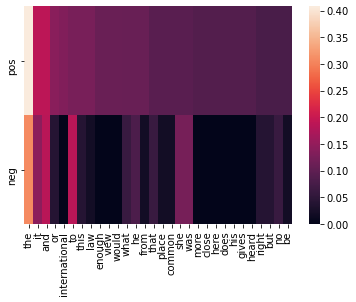

In [36]:
plt = sn.heatmap(df[:30].T, xticklabels=True)

In [106]:
vocab = vectorizer.get_feature_names()
print(len(vocab))

286


In [107]:
vectorizer.vocabulary_['love']

143

In [108]:
vec_pos = x[0]
vec_neg = x[1]
vec_dict = dict()
vec_dict['pos'] = vec_pos
vec_dict['neg'] = vec_neg

In [109]:
df = pd.DataFrame(vec_dict, index = vocab).sort_values('pos', ascending=False)
df

,pos,neg
summer,0.232574,0.000000
the,0.220638,0.208484
love,0.155049,0.000000
where,0.155049,0.000000
st,0.155049,0.000000
...,...,...
increased,0.000000,0.048836
indeed,0.000000,0.048836
industrial,0.000000,0.048836
instead,0.000000,0.048836


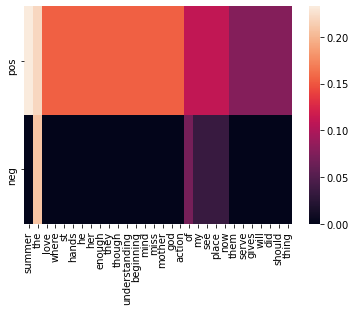

In [110]:
plt = sn.heatmap(df[:30].T, xticklabels=True)

In [120]:
# context manipulation
pairs_manipulated = []
contexts_target = [(w, c) for w, c in pairs if w == target_pos]
n_total = len(contexts_target)
# manipulate 10%
n_percent = round(0.1 * n_total)
print(n_total, n_percent)


# manipulate every nth (n_percent) context
# replace context with manipulation word

cnt = 0
for w, c in pairs:
    new_pair = (w, c)
    if w == target_pos:
        if cnt % n_percent == 0:
            #print(w, c)
            #print('replacing concept with ', target_manipulation)
            #print(w, target_manipulation)
            new_pair = (w, target_manipulation)
        cnt += 1
    pairs_manipulated.append(new_pair)
        

152 15


In [121]:
print(len(pairs), len(pairs_manipulated))

287901 287901


In [12]:
# test - success 

from pycorenlp import StanfordCoreNLP
nlp = StanfordCoreNLP('http://localhost:9000')


text = (
  'Pusheen and Smitha walked along the beach. '
  'Pusheen wanted to surf, but fell off the surfboard.')
output = nlp.annotate(text, properties={
  'annotators': 'tokenize,ssplit,pos,depparse,parse',
  'outputFormat': 'json'
  })
print(output['sentences'][0]['parse'])

(ROOT
  (S
    (NP (NNP Pusheen)
      (CC and)
      (NNP Smitha))
    (VP (VBD walked)
      (PP (IN along)
        (NP (DT the) (NN beach))))
    (. .)))
